# Importation des packages et de la librairie

In [1]:
from ctypes import *
import matplotlib.pyplot as plt
import random
import numpy as np
from dataclasses import dataclass
import math

path_to_dll = "D:/Projet/V2/cmake-build-debug/V2.dll"
mylib = cdll.LoadLibrary(path_to_dll)

# Modèle Linéaire 

## Fonctions

In [2]:
def create_linear_model(input_dim: int = 1):
    mylib.create_linear_model.argtypes = [c_int]
    mylib.create_linear_model.restype = POINTER(c_double)
    model = mylib.create_linear_model(input_dim)
    return model

def predict_linear_model_regression(model , sizeModel, arraySizeP, arrayP):
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_double), arraySizeP, c_int]
    mylib.predict_linear_model_regression.restype = c_double
    tmp = mylib.predict_linear_model_regression(model, arrayP, 2)
    return tmp

def predict_linear_model_classification(model, sizeModel, arraySizeP, arrayP):
    mylib.predict_linear_model_classification.argtypes = [POINTER(c_double), arraySizeP, c_int]
    mylib.predict_linear_model_classification.restype = c_double
    tmp = mylib.predict_linear_model_classification(model, arrayP, 2)
    return tmp

def train_regression_pseudo_inverse_linear_model(model, array1, array2, sizeModel, sizeArray1, sizeArray2, arraySizeP, arrayP):
    mylib.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_double), arraySizeP, arrayP, c_int, c_int, c_int]
    mylib.train_regression_pseudo_inverse_linear_model.restype = None
    mylib.train_regression_pseudo_inverse_linear_model(model, array1, array2, sizeModel, sizeArray1, sizeArray2)
    
def train_classification_rosenblatt_rule_linear_model(model, array1, array2, sizeModel, sizeArray1, arraySizeP, arrayP, alpha, epoch):
    mylib.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_double), arraySizeP, arrayP, c_int, c_int, c_double, c_int]
    mylib.train_classification_rosenblatt_rule_linear_model.restype = None
    mylib.train_classification_rosenblatt_rule_linear_model(model, array1, array2, sizeModel, sizeArray1, alpha, epoch)
    
def destroy_model(model):
    mylib.destroy_my_model.argtypes = [POINTER(c_double)]
    mylib.destroy_my_model.restype = None
    mylib.destroy_my_model(model)

## Test Modele linéaire regression

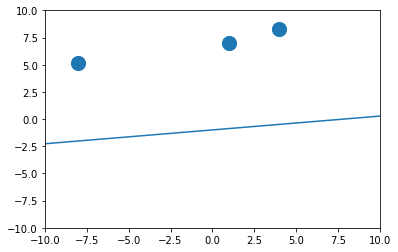

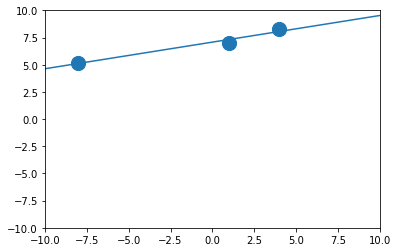

In [3]:
dataset_inputs = [
                [-8],
                [1],
                [4],
]

 

dataset_expected_outputs = [
                5.2,
                7.0,
                8.3
]


model = create_linear_model(1)

flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = []
for i in range(-10, 11):
    test_dataset_inputs.append(i)

predicted_outputs = []

for p in test_dataset_inputs:
    arrtypeP = c_double * len([p])
    arrP = arrtypeP(*[p])

    tmp = predict_linear_model_regression(model, 2, arrtypeP, arrP)
    predicted_outputs.append(tmp)

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

arr_flat_type = c_double * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = arr_flat_type(*flattened_dataset_inputs)

arr_dataset_type = c_double * len(dataset_expected_outputs)
arr_dataset = arr_dataset_type(*dataset_expected_outputs)

train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset, 2, 
                                             len(flattened_dataset_inputs), len(dataset_expected_outputs), 
                                             arr_flat_type, arr_dataset_type)

test_dataset_inputs = []
for i in range(-10, 11):
    temp = i
    test_dataset_inputs.append(temp)
    
result = []
for p in test_dataset_inputs:
    arrtypeP = c_double * len([p])
    arrP = arrtypeP(*[p])

    tmp = predict_linear_model_regression(model, 2, arrtypeP, arrP)
    result.append(tmp)

plt.plot(test_dataset_inputs, result)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

destroy_model(model)

## Test Modele linéaire classification

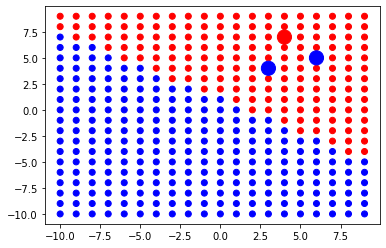

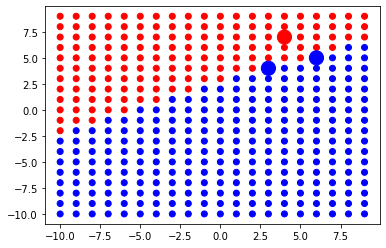

In [55]:
dataset_inputs = [
                [3, 4],
                [6, 5],
                [4, 7],
]

 

dataset_expected_outputs = [
                1,
                1,
                -1,
]


#Initialisation du model
model = create_linear_model(2)
x = np.ctypeslib.as_array(model, (3,))


#Création du dataSet de test
test_dataset = [[x1, x2] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

#Prediction du model avant entrainement
predicted_outputs = []
for p in test_dataset:
    arr_type = c_double * len(p)
    arr = arr_type(*p)
    tmp = predict_linear_model_classification(model, len(x), arr_type, arr)
    predicted_outputs.append(tmp)
    
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])
    
#Entrainement du model
alpha = 0.001
epoch = 10000
arr_type_flattened = c_double * len(flattened_dataset_inputs)
arr_flattened = arr_type_flattened(*flattened_dataset_inputs)

arr_type_outputs = c_double * len(dataset_expected_outputs)
arr_outputs = arr_type_outputs(*dataset_expected_outputs)

train_classification_rosenblatt_rule_linear_model(model, arr_flattened, arr_outputs, len(x), 
                                             len(flattened_dataset_inputs), arr_type_flattened, arr_type_outputs, alpha, epoch)

result = []
for p in test_dataset:
    arr_type = c_double * len(p)
    arr = arr_type(*p)
    tmp = predict_linear_model_classification(model, len(x), arr_type, arr)
    result.append(tmp)

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in result]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_model(model)

# Modèle PMC

## Fonctions

In [5]:
def create_PMC_model(initialisation, initP, initSizeP):
    mylib.create_PMC_model.argtypes = [initP, c_int]
    mylib.create_PMC_model.restype = c_void_p
    model = mylib.create_PMC_model(initialisation, int(initSizeP))
    return model

def lengthModel(model):
    mylib.getLengthX.argtypes = [c_void_p]
    mylib.restype = c_int
    length = mylib.getLengthX(model)
    return length

def predict_PMC_model(model, arraySizeP, arrayP, classification):
    mylib.predict_PMC_model.argtypes = [c_void_p, arraySizeP, c_bool]
    mylib.predict_PMC_model.restype = POINTER(c_double)
    predict = mylib.predict_PMC_model(model, arrayP, classification)
    return predict

def train_stochastic_gradient_backpropagation_PMC_model(model, arrayP1, arraySizeP1, arrayP2, arraySizeP2, sizeArray1, alpha, epoch, classification):
    mylib.train_stochastic_gradient_backpropagation_PMC_model.argtypes = [c_void_p, arraySizeP1, c_int, arraySizeP2, c_double, c_int, c_bool]
    mylib.train_stochastic_gradient_backpropagation_PMC_model.restype = None
    mylib.train_stochastic_gradient_backpropagation_PMC_model(model, arrayP1, sizeArray1, arrayP2, alpha, epoch, classification)

## Test PMC classification

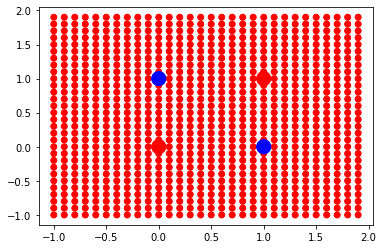

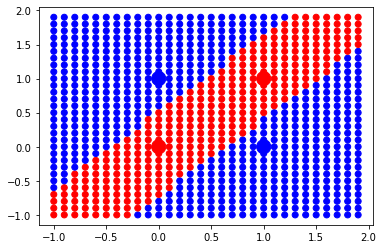

In [6]:
#Datasets
dataset_inputs = [
                [0, 0],
                [1, 1],
                [0, 1],
                [1, 0],
]

dataset_expected_outputs = [
                -1,
                -1,
                1,
                1,
]

#Initialisation du model
init_tab = [2, 2, 1]
init_type = c_int * len(init_tab)
init = init_type(*init_tab)
model = create_PMC_model(init, init_type, len(init_tab))

#Création du dataSet de test
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

#Prediction du model avant entrainement
tmp_len = lengthModel(model)
predicted_outputs = []
for p in test_dataset:
    arrtypeP = c_double * len(p)
    arrP = arrtypeP(*p)    
    tmp = predict_PMC_model(model, arrtypeP, arrP, True)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr[0])
    
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

    
#Entrainement du model
alpha = 0.001
epoch = 100000
classification = True
arrtype_flat = c_double * len(flattened_dataset_inputs)
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrtype_exp = c_double * len(dataset_expected_outputs)
arr_exp = arrtype_exp(*dataset_expected_outputs)

train_stochastic_gradient_backpropagation_PMC_model(model, arr_flat, arrtype_flat, arr_exp, arrtype_exp, 
                                                    len(flattened_dataset_inputs), alpha, epoch, classification)


#Prédiction aprés entrainement
predicted_outputs = []
for p in test_dataset:
    arrtypeP = c_double * len(p)
    arrP = arrtypeP(*p)
    tmp = predict_PMC_model(model, arrtypeP, arrP, True)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr[0])
    
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

## Test PMC régression

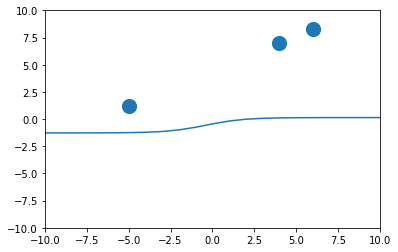

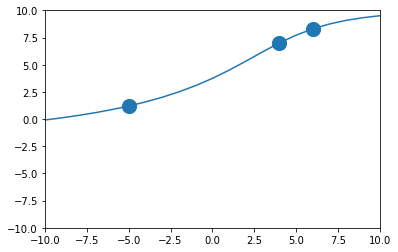

In [15]:
#Datasets
dataset_inputs = [
                [-5],
                [4],
                [6],
]

 

dataset_expected_outputs = [
                1.2,
                7,
                8.3
]


#Initialisation du model
init_tab = [1, 3, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
model = create_PMC_model(init, init_type, len(init_tab))


#Prediction du model avant entrainement
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
test_dataset_inputs = [i for i in range(-10, 11)]

predicted_outputs = []
for p in test_dataset_inputs:
    arrtypeP = c_double * len([p])
    arrP = arrtypeP(*[p])    
    tmp = predict_PMC_model(model, arrtypeP, arrP, False)
    predicted_outputs.append(tmp[0])

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()


#Entrainement du model
alpha = 0.001
epoch = 100000
classification = False
arrtype_flat = c_double * len(flattened_dataset_inputs)
arr_flat = arrtype_flat(*flattened_dataset_inputs)
arrtype_exp = c_double * len(dataset_expected_outputs)
arr_exp = arrtype_exp(*dataset_expected_outputs)

train_stochastic_gradient_backpropagation_PMC_model(model, arr_flat, arrtype_flat, arr_exp, arrtype_exp, 
                                                    len(flattened_dataset_inputs), alpha, epoch, classification)


#Prédiction aprés entrainement
test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = []
for p in test_dataset_inputs:
    arrtypeP = c_double * len([p])
    arrP = arrtypeP(*[p])    
    tmp = predict_PMC_model(model, arrtypeP, arrP, False)
    predicted_outputs.append(tmp[0])
        
plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

## Test PMC classification à 3 classes

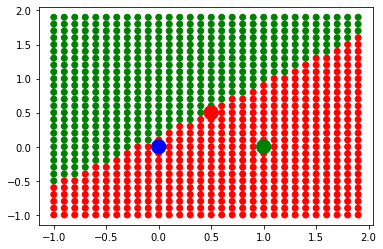

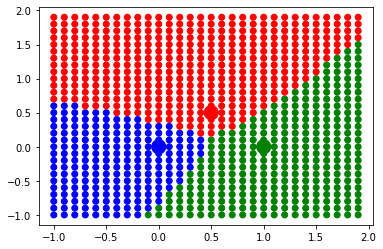

In [16]:
#Datasets
dataset_inputs = [
                [0, 0],
                [0.5, 0.5],
                [1, 0],
]

dataset_expected_outputs = [
                [1, -1, -1],
                [-1, 1, -1],
                [-1, -1, 1]
]

#Initialisation du model
init_tab = [2, 3, 3]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
model = model = create_PMC_model(init, init_type, len(init_tab))


#Création du dataSet de test
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in dataset_expected_outputs]


#Prediction du model avant entrainement
tmp_len = lengthModel(model)
predicted_outputs = []
for p in test_dataset:
    arrtypeP = c_double * len(p)
    arrP = arrtypeP(*p)    
    tmp = predict_PMC_model(model, arrtypeP, arrP, True)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr)
    
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

flattened_dataset_outputs = []
for p in dataset_expected_outputs:
    flattened_dataset_outputs.append(p[0])
    flattened_dataset_outputs.append(p[1])
    flattened_dataset_outputs.append(p[2])

#Entrainement du model
alpha = 0.001
epoch = 10000
classification = True
arrtype_flat = c_double * len(flattened_dataset_inputs)
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrtype_exp = c_double * len(flattened_dataset_outputs)
arr_exp = arrtype_exp(*flattened_dataset_outputs)

train_stochastic_gradient_backpropagation_PMC_model(model, arr_flat, arrtype_flat, arr_exp, arrtype_exp, 
                                                    len(flattened_dataset_inputs), alpha, epoch, classification)


#Prédiction aprés entrainement
predicted_outputs = []
for p in test_dataset:
    arrtypeP = c_double * len(p)
    arrP = arrtypeP(*p)
    tmp = predict_PMC_model(model, arrtypeP, arrP, True)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr)

predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()